In [1]:
import os
os.getcwd()

'/content'

In [2]:
os.listdir()

['.config', 'drive', 'sample_data']

- raw data에서 데이터 가져오기

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- 데이터 안에서 문자열 가진 컬럼들만 뽑아내기

In [4]:
# 1) 문자열(object) 컬럼만 선택
cat_cols = df.select_dtypes(include=['object']).columns

# 2) 각 문자열 컬럼의 고유값 리스트 만들기
unique_values = {
    col: sorted(df[col].dropna().unique().tolist())
    for col in cat_cols
}

unique_values

{'MSZoning': ['C (all)', 'FV', 'RH', 'RL', 'RM'],
 'Street': ['Grvl', 'Pave'],
 'Alley': ['Grvl', 'Pave'],
 'LotShape': ['IR1', 'IR2', 'IR3', 'Reg'],
 'LandContour': ['Bnk', 'HLS', 'Low', 'Lvl'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LotConfig': ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['Blmngtn',
  'Blueste',
  'BrDale',
  'BrkSide',
  'ClearCr',
  'CollgCr',
  'Crawfor',
  'Edwards',
  'Gilbert',
  'IDOTRR',
  'MeadowV',
  'Mitchel',
  'NAmes',
  'NPkVill',
  'NWAmes',
  'NoRidge',
  'NridgHt',
  'OldTown',
  'SWISU',
  'Sawyer',
  'SawyerW',
  'Somerst',
  'StoneBr',
  'Timber',
  'Veenker'],
 'Condition1': ['Artery',
  'Feedr',
  'Norm',
  'PosA',
  'PosN',
  'RRAe',
  'RRAn',
  'RRNe',
  'RRNn'],
 'Condition2': ['Artery',
  'Feedr',
  'Norm',
  'PosA',
  'PosN',
  'RRAe',
  'RRAn',
  'RRNn'],
 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
 'HouseStyle': ['1.5Fin',
  '1.5Unf',
  '1Story',
  '2.5Fin',
  '2.5U

- 컬럼별 속성값 확인 후 속성값 갯수와 속성값을 정리한 표 생성

In [5]:
# 요약표 생성
summary_df = pd.DataFrame({
    'column': cat_cols,
    'unique_count': [df[col].nunique() for col in cat_cols],
    'unique_values': [sorted(df[col].dropna().unique().tolist()) for col in cat_cols]
})

summary_df

,column,unique_count,unique_values
0,MSZoning,5,"[C (all), FV, RH, RL, RM]"
1,Street,2,"[Grvl, Pave]"
2,Alley,2,"[Grvl, Pave]"
3,LotShape,4,"[IR1, IR2, IR3, Reg]"
4,LandContour,4,"[Bnk, HLS, Low, Lvl]"
5,Utilities,2,"[AllPub, NoSeWa]"
6,LotConfig,5,"[Corner, CulDSac, FR2, FR3, Inside]"
7,LandSlope,3,"[Gtl, Mod, Sev]"
8,Neighborhood,25,"[Blmngtn, Blueste, BrDale, BrkSide, ClearCr, C..."
9,Condition1,9,"[Artery, Feedr, Norm, PosA, PosN, RRAe, RRAn, ..."


- 텍스트 컬럼들을 순서형 패턴과 명목형 패턴으로 분류하기

[순서형]은 수치화하여 Saleprice와 상관관계 계산 가능

[명목형]은 수치화하기 애매하기에 분류해서 따로 상관관계를 봐야할 듯

In [6]:
# 순서형 패턴(등급형)
ordinal_patterns = set(['Ex', 'Gd', 'TA', 'Fa', 'Po',
                        'GLQ','ALQ','BLQ','Rec','LwQ','Unf',
                        'Av','Mn','No','Gd'])  # 노출/지하실 등급 패턴도 포함

ordinal_cols = [] # 순서형 변수들 리스트
nominal_cols = [] # 명목형 변수들 리스트

for col in cat_cols:
    values = set(df[col].dropna().unique())
    # 값의 대부분이 ordinal 패턴에 있으면 순서형으로 분류
    if len(values & ordinal_patterns) >= 2:
        ordinal_cols.append(col)
    else:
        nominal_cols.append(col)

ordinal_cols, nominal_cols

(['ExterQual',
  'ExterCond',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'FireplaceQu',
  'GarageQual',
  'GarageCond',
  'PoolQC'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'Foundation',
  'Heating',
  'CentralAir',
  'Electrical',
  'Functional',
  'GarageType',
  'GarageFinish',
  'PavedDrive',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'])

- 순서형 컬럼들을 수치화하기
* 순서형의 경우 결측치는 0으로 두는 방식을 선택

In [7]:
import numpy as np
import pandas as pd

# 1) 공통 품질/상태 등급: Ex > Gd > TA > Fa > Po
qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

# 2) 지하실 노출: Gd > Av > Mn > No
bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}

# 3) 지하실 마감 타입: GLQ > ALQ > BLQ > Rec > LwQ > Unf
bsmt_fin_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}

# (선택) 너 결과에 없지만 가끔 함께 쓰는 기능성(Functional)이 순서형일 때가 있어 참고용
functional_map = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1}

# 네가 분류한 순서형 컬럼 리스트(그대로 사용)
ordinal_cols = [
  'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
  'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
  'GarageQual','GarageCond','PoolQC'
]

# 각 컬럼에 적용할 매핑 지정
ordinal_mappings = {
    'ExterQual': qual_map,
    'ExterCond': qual_map,
    'BsmtQual': qual_map,
    'BsmtCond': qual_map,
    'HeatingQC': qual_map,
    'KitchenQual': qual_map,
    'FireplaceQu': qual_map,
    'GarageQual': qual_map,
    'GarageCond': qual_map,
    'PoolQC': qual_map,

    'BsmtExposure': bsmt_exposure_map,
    'BsmtFinType1': bsmt_fin_map,
    'BsmtFinType2': bsmt_fin_map,
}

# 변환: 결측/빈값은 0점 처리
df_ord = df.copy()

for col, mp in ordinal_mappings.items():
    df_ord[col] = (
        df_ord[col]
        .replace('', np.nan)          # 빈문자 -> NaN
        .map(mp)                      # 매핑
        .fillna(0)                    # NaN/매핑불가 -> 0
        .astype(int)
    )

df_ord[ordinal_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,1,6,1,5,4,0,3,3,0
1,3,3,4,3,4,5,1,5,3,3,3,3,0
2,4,3,4,3,2,6,1,5,4,3,3,3,0
3,3,3,3,4,1,5,1,4,4,4,3,3,0
4,4,3,4,3,3,6,1,5,4,3,3,3,0


- 순서형 컬럼들의 수치화를 통한 Saleprice 상관관계 계산

In [8]:
ordinal_cols = [
  'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
  'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
  'GarageQual','GarageCond','PoolQC'
]

In [9]:
# 순서형 컬럼 + SalePrice만 추출
df_ord = df_ord.copy()
df_ord['SalePrice'] = df['SalePrice']

# 순서형 + 상관계수 계산
ord_corr_df = df_ord[ordinal_cols + ['SalePrice']]
ord_corr = ord_corr_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

ord_corr


,SalePrice
SalePrice,1.000000
ExterQual,0.682639
KitchenQual,0.659600
BsmtQual,0.585207
FireplaceQu,0.520438
HeatingQC,0.427649
BsmtExposure,0.374696
BsmtFinType1,0.304908
GarageQual,0.273839
GarageCond,0.263191


- 시각화

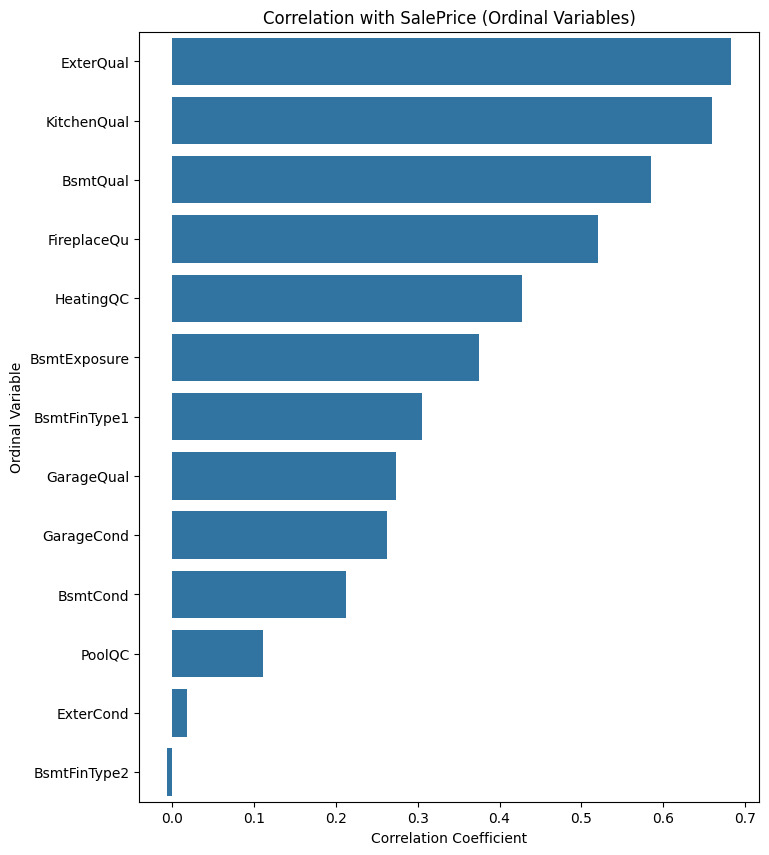

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# SalePrice(자기자신) 제외한 상관계수만 사용
corr_df = ord_corr.drop('SalePrice', errors='ignore').to_frame('corr_with_SalePrice')

plt.figure(figsize=(8, 10))
sns.barplot(
    data=corr_df.reset_index(),
    x='corr_with_SalePrice',
    y='index'
)
plt.title('Correlation with SalePrice (Ordinal Variables)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Ordinal Variable')
plt.show()

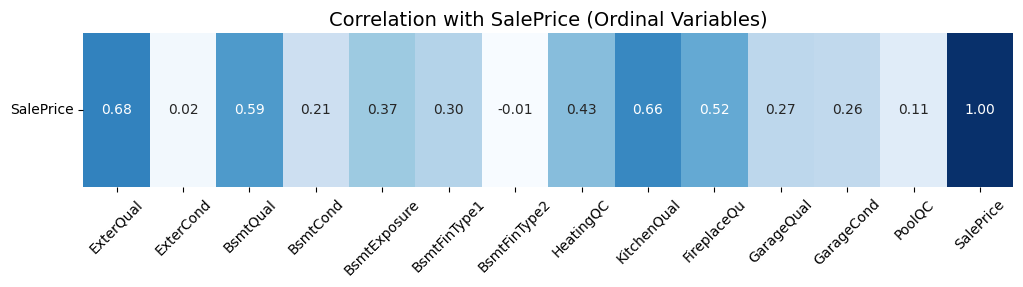

In [11]:
plt.figure(figsize=(12, 2))

sns.heatmap(
    ord_corr_df.corr()[['SalePrice']].T,  # SalePrice 행만 추출
    annot=True,
    fmt=".2f",
    cmap='Blues',   # 🔥 단일 색상 팔레트
    cbar=False      # 원하면 True로 변경
)

plt.title('Correlation with SalePrice (Ordinal Variables)', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

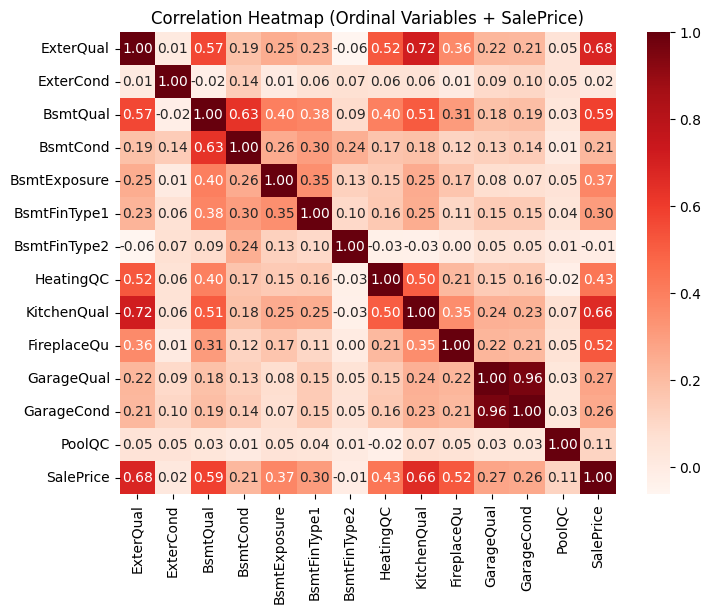

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(ord_corr_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Reds')
plt.title('Correlation Heatmap (Ordinal Variables + SalePrice)')
plt.show()

- 명목형 컬럼 정리(텍스트형 중 순서형이 아닌 것)

전처리 > 더미변수 생성 > saleprice와의 상관관계 > 시각화

In [13]:
# 명목형 컬럼들
nominal_cols = [
  'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
  'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
  'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
  'Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish',
  'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition'
]

In [14]:
# 결측치 처리
# 명목형은 결측치 자체가 정보가 될 수 있기에 아래와 같이 처리하는 것이 안정적
# 결측치가 정보가 될 수 있다 >> 단순 오류가 아닌 "특징이 없다를 의미 ex : 울타리가 없다.
# 아래 코딩은 결측=없음/미기재라는 패턴이며 가격과 연관 있음을 학습시킴
df_nom = df.copy()
df_nom[nominal_cols] = df_nom[nominal_cols].replace('', pd.NA).fillna('Missing')

In [15]:
# 순서가 없어서 숫자로 매핑하면 안되고, One-hot 방식으로 처리
# 문자를 → 숫자로 바꾸는 방법 중 하나이며 “카테고리 하나를 하나의 열(컬럼)”로 만드는 방식
df_nom_encoded = pd.get_dummies(df_nom[nominal_cols + ['SalePrice']],
                                columns=nominal_cols,
                                drop_first=True)

In [16]:
# saleprice와의 상관계수 계산

nom_corr = df_nom_encoded.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
nom_corr

,SalePrice
SalePrice,1.000000
Foundation_PConc,0.497734
Neighborhood_NridgHt,0.402149
SaleType_New,0.357509
SaleCondition_Partial,0.352060
...,...
MSZoning_RM,-0.288065
Foundation_CBlock,-0.343263
GarageType_Detchd,-0.354141
MasVnrType_Missing,-0.367456


/tmp/ipython-input-1720146087.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


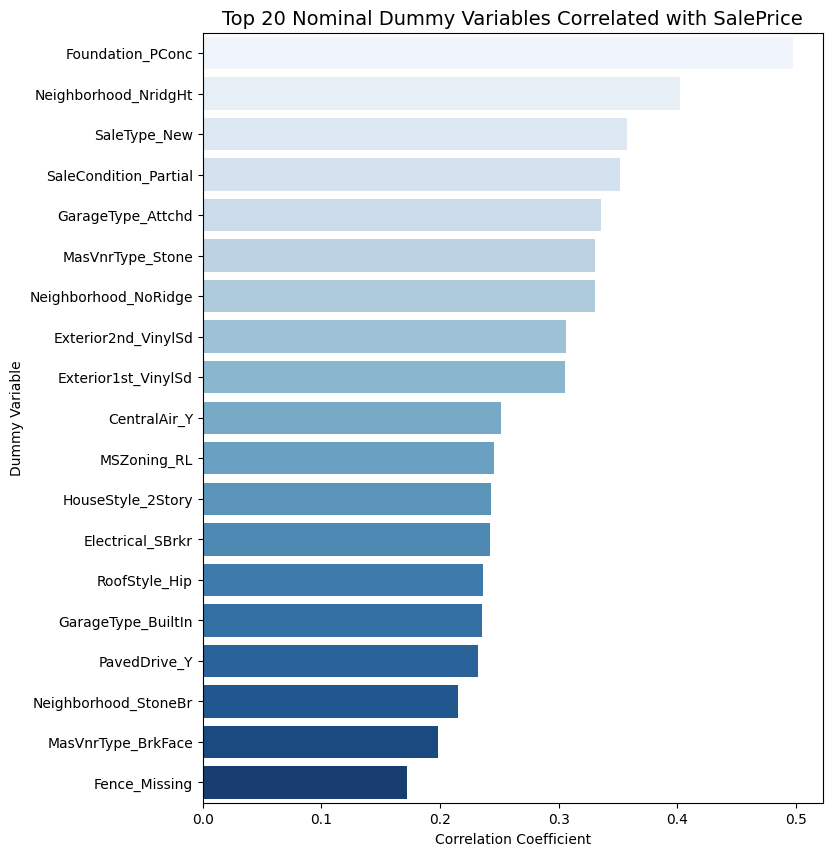

In [17]:
# 상위 20개 시각화 (표와 차트)

import matplotlib.pyplot as plt
import seaborn as sns

top20_nom = nom_corr.head(20).drop('SalePrice', errors='ignore')

plt.figure(figsize=(8,10))
sns.barplot(
    x=top20_nom,
    y=top20_nom.index,
    palette='Blues'
)
plt.title('Top 20 Nominal Dummy Variables Correlated with SalePrice', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Dummy Variable')
plt.show()


- Neighborhood 항목만 one-hot 방식으로 계산

In [18]:
import pandas as pd

# 1) Neighborhood만 one-hot (drop_first=False로 전체 다 봄)
nbhd_dummies = pd.get_dummies(df["Neighborhood"], prefix="Neighborhood", drop_first=False)

# 2) SalePrice와 합쳐서 상관계수 계산
tmp = pd.concat([df["SalePrice"], nbhd_dummies], axis=1)
corr_series = tmp.corr(numeric_only=True)["SalePrice"].drop("SalePrice")

# 3) 보기 좋게 정리
corr_df = corr_series.sort_values(ascending=False).reset_index()
corr_df.columns = ["dummy_col", "corr_with_SalePrice"]

# 상위/하위 확인
print("상관계수 상위 10개")
display(corr_df.head(10))

print("\n상관계수 하위 10개")
display(corr_df.tail(10))


상관계수 상위 10개


,dummy_col,corr_with_SalePrice
0,Neighborhood_NridgHt,0.402149
1,Neighborhood_NoRidge,0.330424
2,Neighborhood_StoneBr,0.215363
3,Neighborhood_Somerst,0.140058
4,Neighborhood_Timber,0.126236
5,Neighborhood_CollgCr,0.072626
6,Neighborhood_Crawfor,0.071160
7,Neighborhood_Veenker,0.063471
8,Neighborhood_ClearCr,0.055718
9,Neighborhood_Gilbert,0.035940



상관계수 하위 10개


,dummy_col,corr_with_SalePrice
15,Neighborhood_Mitchel,-0.057845
16,Neighborhood_SWISU,-0.063705
17,Neighborhood_BrDale,-0.101303
18,Neighborhood_MeadowV,-0.112544
19,Neighborhood_Sawyer,-0.128394
20,Neighborhood_BrkSide,-0.143648
21,Neighborhood_IDOTRR,-0.164056
22,Neighborhood_Edwards,-0.179949
23,Neighborhood_NAmes,-0.188513
24,Neighborhood_OldTown,-0.192189


# 수치형 데이터와 함께 saleprice 상관계수 비교하기

* 활용할 상관계수 뽑기

####✔ 숫자형・순서형

0.3 이상: 후보

0.5 이상: 핵심 후보(거의 확정)


####✔ 명목형(더미)

상위 20~30개만 남기기

In [19]:
# 수치형 데이터 분리

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [20]:
# 수치형 상관계수 계산
num_corr = df[num_cols].corr()['SalePrice'].sort_values(ascending=False)
num_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [21]:
## 상관계수 top 변수 선별
### 1. 수치형
num_cols = [c for c in num_cols if c != 'SalePrice']

num_corr = df[num_cols].corrwith(df['SalePrice']).sort_values(key=lambda s: s.abs(), ascending=False)

num_corr_filtered = num_corr[num_corr.abs() >= 0.3]
# num_corr.head(20), len(num_corr_filtered) : 상위 20개만 보고 싶을 때 사용
num_corr[num_corr.abs() >= 0.3]

# num_corr을 강제로 Series로 다시 변환
if isinstance(num_corr, list):
    num_corr = pd.Series(num_corr, index=num_cols)

# 필터링 다시 적용
num_corr_filtered = num_corr[num_corr.abs() >= 0.3]
num_corr_filtered


,0
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


In [22]:
### 2. 순서형
ord_corr_df = df_ord[ordinal_cols + ['SalePrice']]
ord_corr = ord_corr_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

ord_corr
ord_corr_filtered = ord_corr[ord_corr.abs() >= 0.3]
ord_corr_filtered

,SalePrice
SalePrice,1.000000
ExterQual,0.682639
KitchenQual,0.659600
BsmtQual,0.585207
FireplaceQu,0.520438
HeatingQC,0.427649
BsmtExposure,0.374696
BsmtFinType1,0.304908


In [23]:
### 3. 명목형
## 절대값 0.3 이상인 값 정리(부호의 방향만 다를 뿐, 절댓값이 크면 영향력이 큰 것임)
nom_corr = df_nom_encoded.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
nom_corr
nom_corr_filtered = nom_corr[nom_corr.abs() >= 0.3]
nom_corr_filtered

,SalePrice
SalePrice,1.000000
Foundation_PConc,0.497734
Neighborhood_NridgHt,0.402149
SaleType_New,0.357509
SaleCondition_Partial,0.352060
GarageType_Attchd,0.335961
MasVnrType_Stone,0.330476
Neighborhood_NoRidge,0.330424
Exterior2nd_VinylSd,0.306389
Exterior1st_VinylSd,0.305009


# 최종 후보 리스트

In [24]:
## 위 3가지 형식의 상관계수 0.3 이상의 값을 하나로 합치기
num_corr_filtered = num_corr_filtered.drop('SalePrice', errors='ignore')
ord_corr_filtered = ord_corr_filtered.drop('SalePrice', errors='ignore')
nom_corr_filtered = nom_corr_filtered.drop('SalePrice', errors='ignore')

import pandas as pd

df_num = num_corr_filtered.rename('corr').reset_index().rename(columns={'index':'feature'})
df_num['type'] = '수치형'

df_ord = ord_corr_filtered.rename('corr').reset_index().rename(columns={'index':'feature'})
df_ord['type'] = '순서형'

df_nom = nom_corr_filtered.rename('corr').reset_index().rename(columns={'index':'feature'})
df_nom['type'] = '명목형'

all_corr_df = pd.concat([df_num, df_ord, df_nom], ignore_index=True)

all_corr_df['abs_corr'] = all_corr_df['corr'].abs()
all_corr_df = all_corr_df.sort_values('abs_corr', ascending=False).reset_index(drop=True)

all_corr_df



,feature,corr,type,abs_corr
0,OverallQual,0.790982,수치형,0.790982
1,GrLivArea,0.708624,수치형,0.708624
2,ExterQual,0.682639,순서형,0.682639
3,KitchenQual,0.659600,순서형,0.659600
4,GarageCars,0.640409,수치형,0.640409
5,GarageArea,0.623431,수치형,0.623431
6,TotalBsmtSF,0.613581,수치형,0.613581
7,1stFlrSF,0.605852,수치형,0.605852
8,BsmtQual,0.585207,순서형,0.585207
9,FullBath,0.560664,수치형,0.560664


In [25]:
type_count = all_corr_df.groupby('type').size().reset_index(name='count')
type_count

,type,count
0,명목형,13
1,수치형,18
2,순서형,7


In [26]:
## 다중공선성 검증 위한 최종변수 목록 생성
## 세 그룹에서 추린 모든 변수 → 중복 없이 하나의 통합 리스트로 만들어 다음 단계로 넘긴다
candidate_features = all_corr_df['feature'].drop_duplicates().tolist()
len(candidate_features), candidate_features[:20]

(38,
 ['OverallQual',
  'GrLivArea',
  'ExterQual',
  'KitchenQual',
  'GarageCars',
  'GarageArea',
  'TotalBsmtSF',
  '1stFlrSF',
  'BsmtQual',
  'FullBath',
  'TotRmsAbvGrd',
  'YearBuilt',
  'FireplaceQu',
  'YearRemodAdd',
  'Foundation_PConc',
  'GarageYrBlt',
  'MasVnrArea',
  'Fireplaces',
  'HeatingQC',
  'GarageFinish_Unf'])

# 리스트 정리
## *중복되는 정보가진 변수 제거
> 다중공선성 제거

##38개의 feature를 실제 데이터(df)에서 꺼내와서 VIF용 X를 만드는 단계

다중공선성을 확인하는 지표인 VIF는 숫자만 받을 수 있음
X = VIF 분석을 위해 넣을 ‘변수들의 실제 값들을 모아둔 표’

데이터 분석(특히 회귀분석, VIF, 머신러닝)에서 **X는 ‘독립변수(설명변수)만 모아 둔 데이터프레임’**을 뜻

SalePrice = y (종속변수)
그 외 가격에 영향을 줄 것 같은 변수들 = X (독립변수들)

In [27]:
selected_cols = all_corr_df['feature'].tolist()


In [28]:
# 수치형 + 순서형 = df에서 가져오기
numeric_ordinal_cols = [c for c in selected_cols if c in df.columns]
X_num_ord = df[numeric_ordinal_cols]

# 명목형 dummy = df_nom_encoded에서 가져오기
dummy_cols = [c for c in selected_cols if c in df_nom_encoded.columns]
X_dummy = df_nom_encoded[dummy_cols]


In [29]:
X = pd.concat([X_num_ord, X_dummy], axis=1)


In [30]:
X = X.loc[:, X.nunique() > 1]


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

def calculate_vif(df):
    df_const = add_constant(df)
    vif_df = pd.DataFrame()
    vif_df['feature'] = df.columns
    vif_df['VIF'] = [
        variance_inflation_factor(df_const.values, i+1)
        for i in range(len(df.columns))
    ]
    return vif_df

vif_result = calculate_vif(X)
vif_result.sort_values("VIF", ascending=False)


TypeError: '>=' not supported between instances of 'str' and 'float'

In [33]:
X

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,...,MasVnrType_Missing,SaleType_New,GarageType_Detchd,SaleCondition_Partial,Foundation_CBlock,GarageType_Attchd,MasVnrType_Stone,Neighborhood_NoRidge,Exterior2nd_VinylSd,Exterior1st_VinylSd
0,7,1710,Gd,Gd,2,548,856,856,Gd,2,...,False,False,False,False,False,True,False,False,True,True
1,6,1262,TA,TA,2,460,1262,1262,Gd,2,...,True,False,False,False,True,True,False,False,False,False
2,7,1786,Gd,Gd,2,608,920,920,Gd,2,...,False,False,False,False,False,True,False,False,True,True
3,7,1717,TA,Gd,3,642,756,961,TA,1,...,True,False,True,False,False,False,False,False,False,False
4,8,2198,Gd,Gd,3,836,1145,1145,Gd,2,...,False,False,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,TA,TA,2,460,953,953,Gd,2,...,True,False,False,False,False,True,False,False,True,True
1456,6,2073,TA,TA,2,500,1542,2073,Gd,2,...,False,False,False,False,True,True,True,False,False,False
1457,7,2340,Ex,Gd,1,252,1152,1188,TA,2,...,True,False,False,False,False,True,False,False,False,False
1458,5,1078,TA,Gd,1,240,1078,1078,TA,1,...,True,False,False,False,True,True,False,False,False,False


In [34]:
obj_cols = X.select_dtypes(include='object').columns
obj_cols, len(obj_cols)


(Index(['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC',
        'BsmtExposure', 'BsmtFinType1'],
       dtype='object'),
 7)

In [35]:
# X 안에 아직 문자열(object)인 순서형 컬럼이 남아있기에 그 컬럼들을 수치화(매핑)시
ordinal_maps = {
    'ExterQual':     {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, None:0},
    'KitchenQual':   {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, None:0},
    'BsmtQual':      {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, None:0},

    # FireplaceQu: 난이도 동일
    'FireplaceQu':   {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, None:0},

    # HeatingQC
    'HeatingQC':     {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, None:0},

    # Exposure
    'BsmtExposure':  {'Gd':4, 'Av':3, 'Mn':2, 'No':1, None:0},

    # BsmtFinType1
    'BsmtFinType1':  {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, None:0}
}


In [36]:
for col, mapping in ordinal_maps.items():
    if col in X.columns:
        X[col] = X[col].map(mapping)


In [37]:
X.select_dtypes(include='object').columns


Index([], dtype='object')

In [40]:
# (1) 숫자형이 아닌 컬럼들 확인
non_numeric_cols = X.columns[~X.apply(lambda s: pd.api.types.is_numeric_dtype(s))]
non_numeric_cols, len(non_numeric_cols)

X.select_dtypes(include=['object', 'category']).columns


Index([], dtype='object')

In [41]:
import numpy as np
import pandas as pd

# 전부 숫자로 강제 변환 (변환 불가 -> NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# inf 제거
X = X.replace([np.inf, -np.inf], np.nan)

# 결측치 채우기 (중앙값)
X = X.fillna(X.median(numeric_only=True))

# 혹시라도 여전히 NaN 남으면 0으로 마무리
X = X.fillna(0)


In [42]:
X.select_dtypes(include=['object', 'category']).columns


Index([], dtype='object')

In [43]:
check_cols = ['ExterQual','KitchenQual','BsmtQual','FireplaceQu','HeatingQC','BsmtExposure','BsmtFinType1']

for col in check_cols:
    if col in X.columns:
        # 매핑 전 원본 df에서 실제 값 확인하는 게 가장 정확하지만,
        # 지금은 X 기준으로도 이상치(문자)가 남아있는지 먼저 확인
        uniq = pd.Series(X[col]).dropna().unique()
        print(col, uniq[:20])


ExterQual [4 3 5 2]
KitchenQual [4 3 5 2]
BsmtQual [4. 3. 5. 2.]
FireplaceQu [4. 3. 2. 5. 1.]
HeatingQC [5 4 3 2 1]
BsmtExposure [1. 4. 2. 3.]
BsmtFinType1 [6. 5. 1. 3. 4. 2.]


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 숫자형만 남기기(방어)
X_vif = X.select_dtypes(include=[np.number]).copy()
X_vif = X_vif.loc[:, X_vif.nunique() > 1]  # 단일값 컬럼 제거

def calculate_vif(df):
    df_const = add_constant(df)
    return pd.DataFrame({
        "feature": df.columns,
        "VIF": [variance_inflation_factor(df_const.values, i+1) for i in range(df.shape[1])]
    })

vif_result = calculate_vif(X_vif).sort_values("VIF", ascending=False)
vif_result


,feature,VIF
1,GrLivArea,129.891532
22,2ndFlrSF,90.978450
7,1stFlrSF,73.773461
4,GarageCars,5.529624
5,GarageArea,5.430347
6,TotalBsmtSF,4.368590
11,YearBuilt,4.187345
0,OverallQual,3.549388
10,TotRmsAbvGrd,3.500423
14,GarageYrBlt,3.285833


In [48]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True)).fillna(0)


In [49]:
X.select_dtypes(include=['object','category']).columns


Index([], dtype='object')

In [50]:
X.dtypes.value_counts()


,count
int64,18
bool,13
float64,7


In [52]:
X = X.astype(float)


In [53]:
import numpy as np

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))


In [54]:
vif_result = calculate_vif(X)
vif_result.sort_values("VIF", ascending=False)


,feature,VIF
1,GrLivArea,130.688430
22,2ndFlrSF,91.620636
7,1stFlrSF,74.655787
29,SaleType_New,38.973783
31,SaleCondition_Partial,38.814425
37,Exterior1st_VinylSd,23.760945
36,Exterior2nd_VinylSd,23.526459
4,GarageCars,5.803653
11,YearBuilt,5.774819
25,Foundation_PConc,5.715828


##상관계수로 먼저 유력 후보 38개를 뽑고
##→ VIF로 중복·중복설명력 높은 변수 제거
##→ 남은 변수들 중 SalePrice와 상관계수가 높은 순으로 정렬하면
##‘최종 핵심 변수 리스트’가 된다.

VIF > 10 → 제거 후보
(중복 설명력이 너무 높음 = 다른 변수로 대체 가능)

VIF 5~10 → 관찰 필요

VIF < 5 → 안정적

하지만 상관계수(abs_corr)가 높은데 VIF도 높다면,
→ 둘 중 더 강한 설명력을 가진 변수만 남기면 됨.

In [59]:
len(vif_result)



38

In [60]:
vif_df = vif_result.reset_index(drop=True)


In [61]:
merged_df = pd.merge(
    all_corr_df,     # 상관계수 38개 정보
    vif_df,          # VIF 정보
    on='feature',    # 둘 다 feature 기준으로 결합
    how='left'
)


In [62]:
merged_df = merged_df.sort_values("abs_corr", ascending=False)
merged_df


,feature,corr,type,abs_corr,VIF
0,OverallQual,0.790982,수치형,0.790982,3.719622
1,GrLivArea,0.708624,수치형,0.708624,130.688430
2,ExterQual,0.682639,순서형,0.682639,3.203063
3,KitchenQual,0.659600,순서형,0.659600,2.705845
4,GarageCars,0.640409,수치형,0.640409,5.803653
5,GarageArea,0.623431,수치형,0.623431,5.668345
6,TotalBsmtSF,0.613581,수치형,0.613581,4.603434
7,1stFlrSF,0.605852,수치형,0.605852,74.655787
8,BsmtQual,0.585207,순서형,0.585207,3.042635
9,FullBath,0.560664,수치형,0.560664,2.452207


In [63]:
len(merged_df)


38

##변수마다의 설명을 넣어 표 정리

In [64]:
feature_desc = {
    # 수치/순서형(원본 변수)
    "OverallQual": "전체 자재/마감 품질(종합 등급)",
    "GrLivArea": "지상 거주면적(Above grade living area, sqft)",
    "ExterQual": "외관 품질(Exterior material quality, 등급형)",
    "KitchenQual": "주방 품질(Kitchen quality, 등급형)",
    "GarageCars": "차고 수용 차량 수(대수)",
    "GarageArea": "차고 면적(sqft)",
    "TotalBsmtSF": "지하 전체 면적(sqft)",
    "1stFlrSF": "1층 면적(sqft)",
    "BsmtQual": "지하실 품질/높이(Basement quality, 등급형)",
    "FullBath": "지상 전체 욕실 수(Full bathrooms above grade)",
    "TotRmsAbvGrd": "지상 방 개수(욕실 제외)",
    "YearBuilt": "준공연도(원래 지어진 연도)",
    "FireplaceQu": "벽난로 품질(Fireplace quality, 등급형)",
    "YearRemodAdd": "리모델링/증축 연도(Remodel/addition year)",
    "GarageYrBlt": "차고 준공연도(Garage build year)",
    "MasVnrArea": "외벽 장식벽돌 면적(Masonry veneer area, sqft)",
    "Fireplaces": "벽난로 개수",
    "HeatingQC": "난방 품질/상태(Heating quality, 등급형)",
    "BsmtFinSF1": "지하 마감면적 1(Bsmt finished area type1, sqft)",
    "BsmtExposure": "지하실 노출 정도(창/워크아웃 등, 등급형)",
    "LotFrontage": "대지 전면 길이(도로 접한 길이, feet)",
    "WoodDeckSF": "우드 데크 면적(sqft)",
    "2ndFlrSF": "2층 면적(sqft)",
    "OpenPorchSF": "개방형 포치(현관) 면적(sqft)",
    "BsmtFinType1": "지하실 마감 유형 1(등급형: GLQ/ALQ/…/Unf)",

    # 명목형 원핫 더미(=해당 범주 여부 0/1)
    "Foundation_PConc": "기초 형태가 PConc(콘크리트)인 경우(더미 0/1)",
    "Foundation_CBlock": "기초 형태가 CBlock(콘크리트 블록)인 경우(더미 0/1)",
    "GarageFinish_Unf": "차고 내부 마감이 Unf(미마감)인 경우(더미 0/1)",
    "Neighborhood_NridgHt": "동네(Neighborhood)가 NridgHt인 경우(더미 0/1)",
    "Neighborhood_NoRidge": "동네(Neighborhood)가 NoRidge인 경우(더미 0/1)",
    "MasVnrType_Missing": "외벽 장식벽돌 타입이 Missing(결측/없음 처리)인 경우(더미 0/1)",
    "MasVnrType_Stone": "외벽 장식벽돌 타입이 Stone인 경우(더미 0/1)",
    "SaleType_New": "판매 유형이 New(신축/신규)인 경우(더미 0/1)",
    "SaleCondition_Partial": "판매 조건이 Partial(일부/미완/특정 조건)인 경우(더미 0/1)",
    "GarageType_Detchd": "차고 형태가 Detchd(분리형)인 경우(더미 0/1)",
    "GarageType_Attchd": "차고 형태가 Attchd(부착형)인 경우(더미 0/1)",
    "Exterior1st_VinylSd": "외장재(1차)가 VinylSd(비닐 사이딩)인 경우(더미 0/1)",
    "Exterior2nd_VinylSd": "외장재(2차)가 VinylSd(비닐 사이딩)인 경우(더미 0/1)",
}


In [65]:
merged_with_desc = merged_df.copy()
merged_with_desc["description"] = merged_with_desc["feature"].map(feature_desc)

# 혹시 사전에 없는 게 있으면 확인용 표시
merged_with_desc["description"] = merged_with_desc["description"].fillna("⚠ 설명 미등록(사전에 추가 필요)")

# 보기 좋게 컬럼 순서 정리(원하면)
merged_with_desc = merged_with_desc[["feature", "description", "type", "corr", "abs_corr", "VIF"]]

merged_with_desc


,feature,description,type,corr,abs_corr,VIF
0,OverallQual,전체 자재/마감 품질(종합 등급),수치형,0.790982,0.790982,3.719622
1,GrLivArea,"지상 거주면적(Above grade living area, sqft)",수치형,0.708624,0.708624,130.688430
2,ExterQual,"외관 품질(Exterior material quality, 등급형)",순서형,0.682639,0.682639,3.203063
3,KitchenQual,"주방 품질(Kitchen quality, 등급형)",순서형,0.659600,0.659600,2.705845
4,GarageCars,차고 수용 차량 수(대수),수치형,0.640409,0.640409,5.803653
5,GarageArea,차고 면적(sqft),수치형,0.623431,0.623431,5.668345
6,TotalBsmtSF,지하 전체 면적(sqft),수치형,0.613581,0.613581,4.603434
7,1stFlrSF,1층 면적(sqft),수치형,0.605852,0.605852,74.655787
8,BsmtQual,"지하실 품질/높이(Basement quality, 등급형)",순서형,0.585207,0.585207,3.042635
9,FullBath,지상 전체 욕실 수(Full bathrooms above grade),수치형,0.560664,0.560664,2.452207


In [67]:
to_markdown()

NameError: name 'to_markdown' is not defined

In [66]:
print("merged_df 행 수:", len(merged_df))
print("X 열 수:", X.shape[1])
print("merged_with_desc 행 수:", len(merged_with_desc))


merged_df 행 수: 38
X 열 수: 38
merged_with_desc 행 수: 38


In [68]:
print(merged_with_desc.to_markdown(index=False))


| feature               | description                                                   | type   |      corr |   abs_corr |       VIF |
|:----------------------|:--------------------------------------------------------------|:-------|----------:|-----------:|----------:|
| OverallQual           | 전체 자재/마감 품질(종합 등급)                                | 수치형 |  0.790982 |   0.790982 |   3.71962 |
| GrLivArea             | 지상 거주면적(Above grade living area, sqft)                  | 수치형 |  0.708624 |   0.708624 | 130.688   |
| ExterQual             | 외관 품질(Exterior material quality, 등급형)                  | 순서형 |  0.682639 |   0.682639 |   3.20306 |
| KitchenQual           | 주방 품질(Kitchen quality, 등급형)                            | 순서형 |  0.6596   |   0.6596   |   2.70584 |
| GarageCars            | 차고 수용 차량 수(대수)                                       | 수치형 |  0.640409 |   0.640409 |   5.80365 |
| GarageArea            | 차고 면적(sqft)                                               | 수치형 |  0.623431 | 

# 현재까지의 단계
##✔ 데이터 전처리 완료
##✔ 명목형 원핫, 순서형 매핑 완료
##✔ 유의미 변수 38개 선정 완료
##✔ VIF 계산 성공
##✔ 상관계수 + VIF 통합 해석 테이블 완성
##✔ 각 변수의 설명까지 추가하여 해석가능성 완성

# **최종변수 선정 진행**

In [69]:
# VIF 기준으로 제거할 변수 선정하기
# VIF ≥ 10 → 강한 다중공선성 → 제거 1순위
# VIF 5~10 → 중복 가능성 → 상황 보고 제거 검토
# VIF < 5 → 안전 (선택 기준: 상관계수)

high_vif_cols = merged_with_desc[merged_with_desc["VIF"] >= 10]["feature"].tolist()
high_vif_cols


['GrLivArea',
 '1stFlrSF',
 'SaleType_New',
 'SaleCondition_Partial',
 '2ndFlrSF',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd']

* *대표 변수로 남길 것들

*(지상)GrLivArea ↔ (1stFlrSF, 2ndFlrSF, *(지하)TotalBsmtSF)

*SaleType_New ↔ (YearBuilt, YearRemodAdd, Neighborhood, SaleCondition)

SaleCondition_Partial ↔ (SaleType, *YearBuilt)

Exterior1st/2nd_VinylSd ↔ (*ExteriorQual, Neighborhood)

이 변수들이 서로 중복도가 높기에 1~2개를 남기고 정리하는 것이 좋다.